In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time
import numpy as np

sales_data = pd.read_excel(r'E:\Program Files (x86)\python\图表分析\输出\output.xlsx')


# 1. 筛选数据
# 仅保留客户名称、日期、明细金额和成本这几列
filtered_data = sales_data[['客户名称', '日期', '明细金额', '成本']]

# 2. 制作透视表
# 使用pivot_table函数制作透视表，列为客户名称，行为日期，值为合计
pivot_table = pd.pivot_table(filtered_data, values=['明细金额'], index='日期', columns='客户名称', aggfunc='sum')
print(pivot_table)
pivot_table.to_excel('输出\demo.xlsx')


C:\Users\41829\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23458 (\N{CJK UNIFIED IDEOGRAPH-5BA2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\41829\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25143 (\N{CJK UNIFIED IDEOGRAPH-6237}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\41829\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26126 (\N{CJK UNIFIED IDEOGRAPH-660E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\41829\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32454 (\N{CJK UNIFIED IDEOGRAPH-7EC6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\41829\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 37329 (\

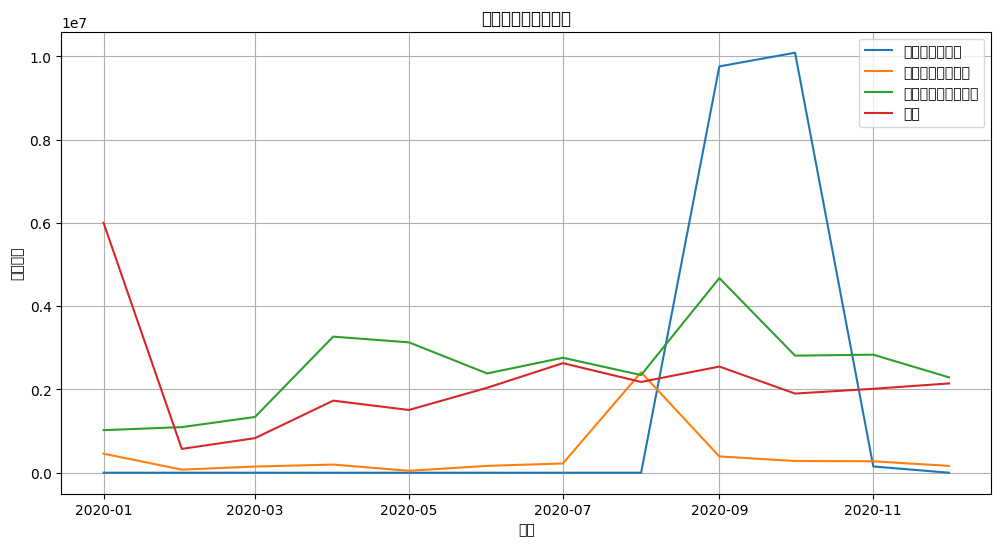

In [28]:
import pandas as pd

# 假设你的销售订单数据存储在一个名为"sales_data.csv"的CSV文件中，可以使用pd.read_csv()加载数据
#sales_data = pd.read_csv(r'E:\Program Files (x86)\python\图表分析\输出\output.xlsx',"sales_data.csv", encoding='GBK')
sales_data = pd.read_excel(r'E:\Program Files (x86)\python\图表分析\输出\output.xlsx')
# 1. 筛选数据
# 仅保留客户名称、日期和明细金额这几列
filtered_data = sales_data[['客户名称', '日期', '明细金额']]

# 2. 制作透视表
# 使用pivot_table函数制作透视表，列为客户名称，行为日期，值为明细金额的合计
pivot_table = pd.pivot_table(filtered_data, values='明细金额', index='日期', columns='客户名称', aggfunc='sum', fill_value=0)

# 3. 合并小客户为"其他"
# 计算每个客户的总明细金额
customer_total = pivot_table.sum(axis=0)

# 找出总明细金额前3的客户
top_3_customers = customer_total.nlargest(3).index

# 创建"其他"列，将不在前3名的客户的合计金额汇总到"其他"列
pivot_table['其他'] = pivot_table.drop(columns=top_3_customers).sum(axis=1)

# 4. 删除不需要的客户列
pivot_table.drop(columns=pivot_table.columns.difference(top_3_customers.union(['其他'])), inplace=True)

# 打印透视表
pivot_table.to_excel('输出\demo.xlsx')

# 5. 绘制折线图
# 将日期列转换为日期时间对象
pivot_table.index = pd.to_datetime(pivot_table.index)

# 绘制折线图
plt.figure(figsize=(12, 6))  # 设置图形大小
for column in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[column], label=column)

plt.xlabel('日期')
plt.ylabel('明细金额')
plt.title('客户明细金额趋势图')
plt.legend(loc='best')  # 添加图例
plt.grid(True)  # 添加网格线

plt.show()





